## Problema 1

Sea $A$ una matriz de tamaño $m \times n$. Demuestre que $A A^{t}$ y $A^{t} A$ tienen los mismos valores propios.

Ayuda: si $x \in \mathbf{R}^{n}$ es vector propio de $A^{t} A$, entonces $A x \in \mathbf{R}^{m}$ es vector propio de $A A^{t}$.

$\textbf{Demostración}$

Supongamos que $\mathrm{A}$ es una matriz de dimensiones $\mathrm{m} \times \mathrm{n}$ y que $\lambda$ es un autovalor distinto de cero de $\mathrm{A}^{\mathrm{T}} \mathrm{A}$. Entonces existe un vector no nulo $\overrightarrow{\mathrm{x}} \in \mathbb{R}^{\mathrm{n}}$ tal que
$$
\left(\mathrm{A}^{\mathrm{T}} \mathrm{A}\right) \overrightarrow{\mathrm{x}}=\lambda \overrightarrow{\mathrm{x}}.
$$
Multiplicando ambos lados de esta ecuación por $\mathrm{A}$:
$$
\begin{aligned}
\mathrm{A}\left(\mathrm{A}^{\mathrm{T}} \mathrm{A}\right) \overrightarrow{\mathrm{x}} & =\mathrm{A} \lambda \overrightarrow{\mathrm{x}} \\
\left(\mathrm{AA}^{\mathrm{T}}\right)(\mathrm{A} \overrightarrow{\mathrm{x}}) & =\lambda(\mathrm{A} \overrightarrow{\mathrm{x}}).
\end{aligned}
$$
Dado que $\lambda \neq 0$ y $\overrightarrow{x} \neq \overrightarrow{0}_n$, entonces $\lambda \overrightarrow{x} \neq \overrightarrow{0}_n$. Por lo tanto, a partir de la ecuación primera, $\left(A^T A\right) \overrightarrow{x} \neq \overrightarrow{0}_n$; de esta manera, $\mathrm{A}^{\mathrm{T}}(\mathrm{A} \overrightarrow{\mathrm{x}}) \neq \overrightarrow{0}_{\mathrm{n}}$, lo que implica que $\mathrm{A} \overrightarrow{\mathrm{x}} \neq \overrightarrow{0}_{\mathrm{m}}$.

Por lo tanto, sea $\overrightarrow{\mathrm{y}} = \mathrm{A} \overrightarrow{\mathrm{x}}$, entonces: 
$$\left(\mathrm{AA}^{\mathrm{T}}\right)\overrightarrow{\mathrm{y}}  =\lambda\overrightarrow{\mathrm{y}}.$$

Esto nos indica que $\overrightarrow{\mathrm{y}}$ o $\mathrm{A} \overrightarrow{\mathrm{x}}$ es un autovector de $\mathrm{AA}^{\mathrm{T}}$ correspondiente al autovalor $\lambda$. Se puede usar un argumento análogo para demostrar que cada autovalor distinto de cero de $\mathrm{AA}^{\mathrm{T}}$ es un autovalor de $\mathrm{A}^{\mathrm{T}} \mathrm{A}$.

$\therefore$   $A A^{T}$ y $A^{T} A$ tienen los mismos valores propios.

In [1]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

print(np.linalg.eig(A @ A.T).eigenvalues)
print(np.linalg.eig(A.T @ A).eigenvalues)

[6.48334192e+02 1.66580756e+00 2.40239252e-14 1.96759480e-14]
[6.48334192e+02 1.66580756e+00 7.52110545e-15]


## Problema 2
Consiga un video corto (menos de 5 segundos de duración) con un escenario fijo y un objeto moviendose. Extraiga 30 imágenes del video en escala de grises y resolución $400 \times 600$. Ponga las imágenes en una matriz $H$ de tamaño $240000 \times 30$, es decir, cada imagen es una columna. Substraiga el promedio de las filas a cada fila de $H$, es decir, defina $A=H-\bar{H}$.

Cálcule los valores propios mayor y menor de la matriz $A A^{t}$ y vectores propios asociados con dichos valores. Represente dichos vectores propios como imágenes en escala de grises y resolución $400 \times 600$.

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
cam = cv2.VideoCapture("pendulo.mp4")

currentframe = 0

try:
    os.mkdir('frames')
except:
    pass

while (True):
    ret, frame = cam.read()
    if ret:
        name = f'frames/frame{currentframe}.jpg'
        cv2.imwrite(name, frame)
        currentframe += 1
    else:
        break


In [8]:
path = 'frames'
H = []
for i,f in enumerate(os.listdir(path)):
    # Seleccionar cada tercer imagen para obtener un dataset de tamaño 30
    if i%5 == 0:
        image_path = path + '/' + f
        # Leer imagen
        image = cv2.imread(image_path)
        # Reducir el tamaño de la imagen
        image = cv2.resize(image, (80,120), interpolation = cv2.INTER_AREA)
        # Cambiar la imagen a blanco y negro
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Volver la imagen un vector
        image = np.ravel(image)
        H.append(image)

H = np.array(H).T
H = H/255

In [9]:
means = np.mean(H, axis=0)

A = H - means

eig = np.linalg.eig(A@A.T)

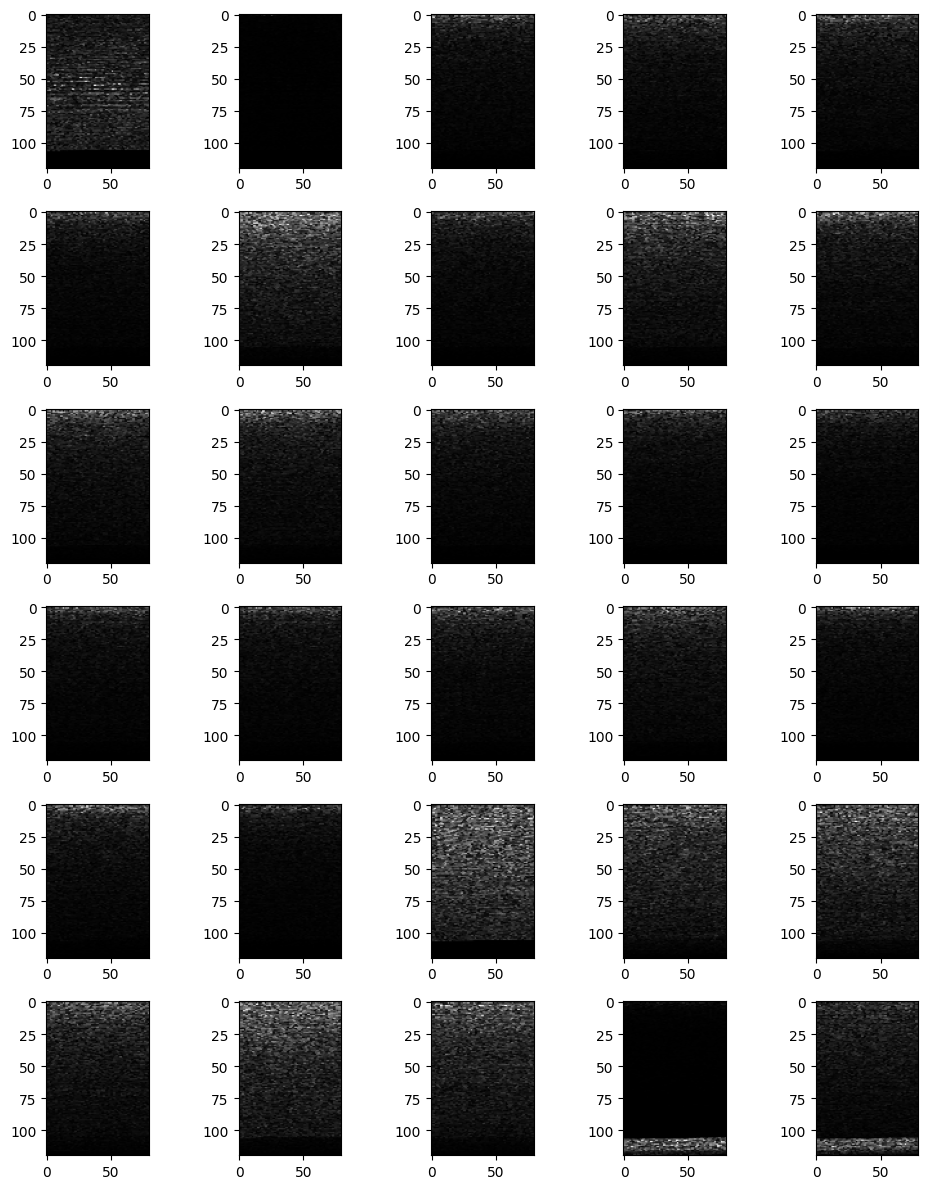

In [13]:
fig, ax = plt.subplots(6,5, figsize=(10,12))

for i in range(6):
    for j in range(5):
        ax[i,j].imshow(np.abs(eig.eigenvectors[i*6+j]*255,).reshape(120,80), cmap= "gray")
        

fig.tight_layout()

Esta es la mayor resolucion que logre dado que para obtener los autovectores de una matriz 24000*24000 decia que tenia que tener 430 gigas de memoria para el calculo, de igual manera se tuvo que añadir que fuera el valor absoluto porque los autovecotres tenian parte compleja.

In [14]:
for i,f in enumerate(os.listdir(path)):
    os.remove(path + "/" + f)

os.rmdir(path)